# Prediction using Supervised Learning
Name : Ahmad Raja Khan

Batch : November 2022

Linkedin : https://www.linkedin.com/in/ahmad-khan-368813209/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dataset = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# Observing the dateset
dataset.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
dataset.shape

(25, 2)

In [9]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
# Null values in dataset
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [11]:
dataset.iloc[1:7]

,Hours,Scores
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


# DATA VISUALIZATION

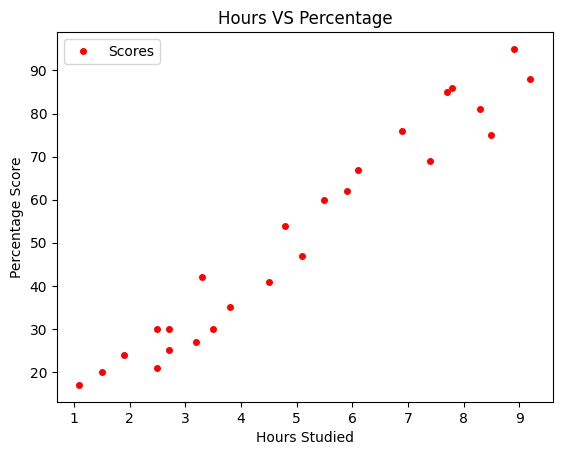

In [16]:
# Plotting the dataset

dataset.plot(x='Hours', y='Scores', style = '.', color = 'Red', markersize = 8)
plt.title("Hours VS Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()


# DATA PREPARATION
Splitting data into Features(Inputs) and Labels(Outputs) after that we will split the whole dataset into two parts (Testing Data and Training data)

In [17]:
x = dataset.iloc[:, :1].values
y = dataset.iloc[:, 1:].values

In [18]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()


# TRAINING COMPLETED





# VISUALIZING THE MODEL

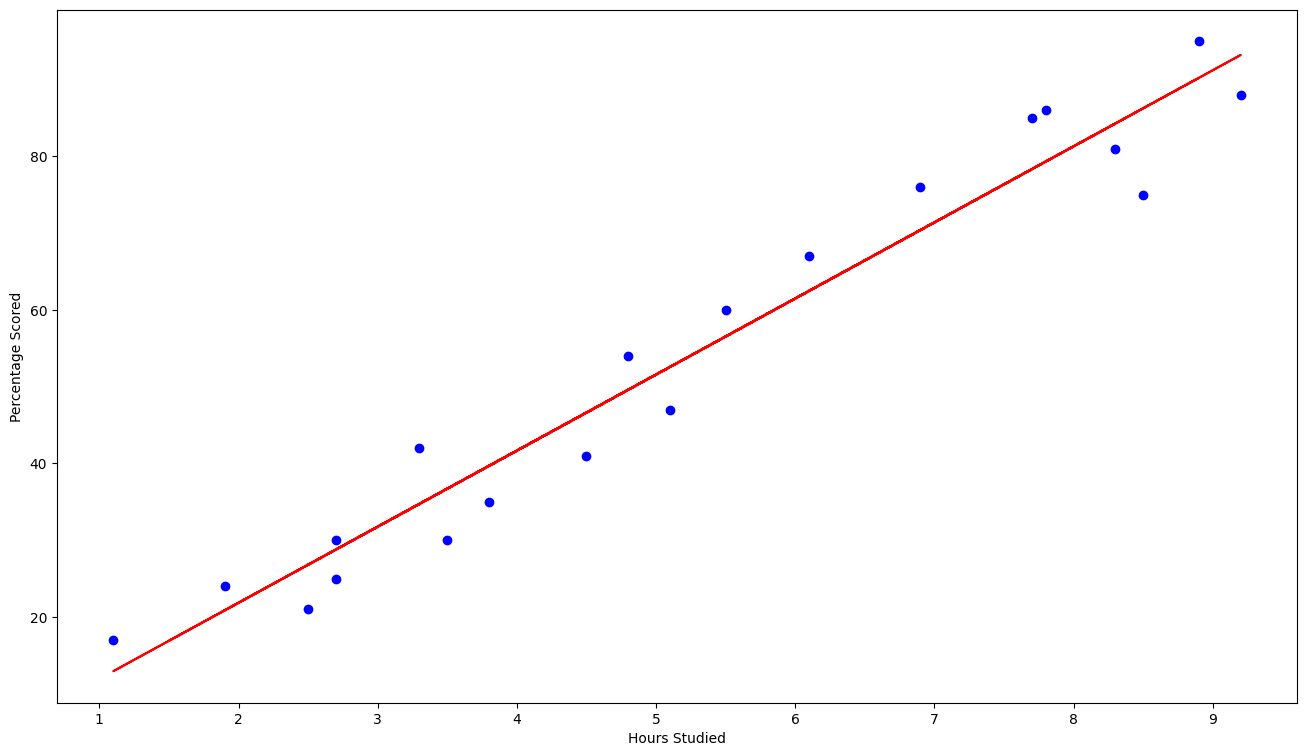

In [26]:
line = regressor.coef_*x + regressor.intercept_

# Plotting for training data

plt.rcParams["figure.figsize"]=[16,9]
plt.scatter(x_train, y_train, color = "blue")
plt.plot(x, line, color = "red")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

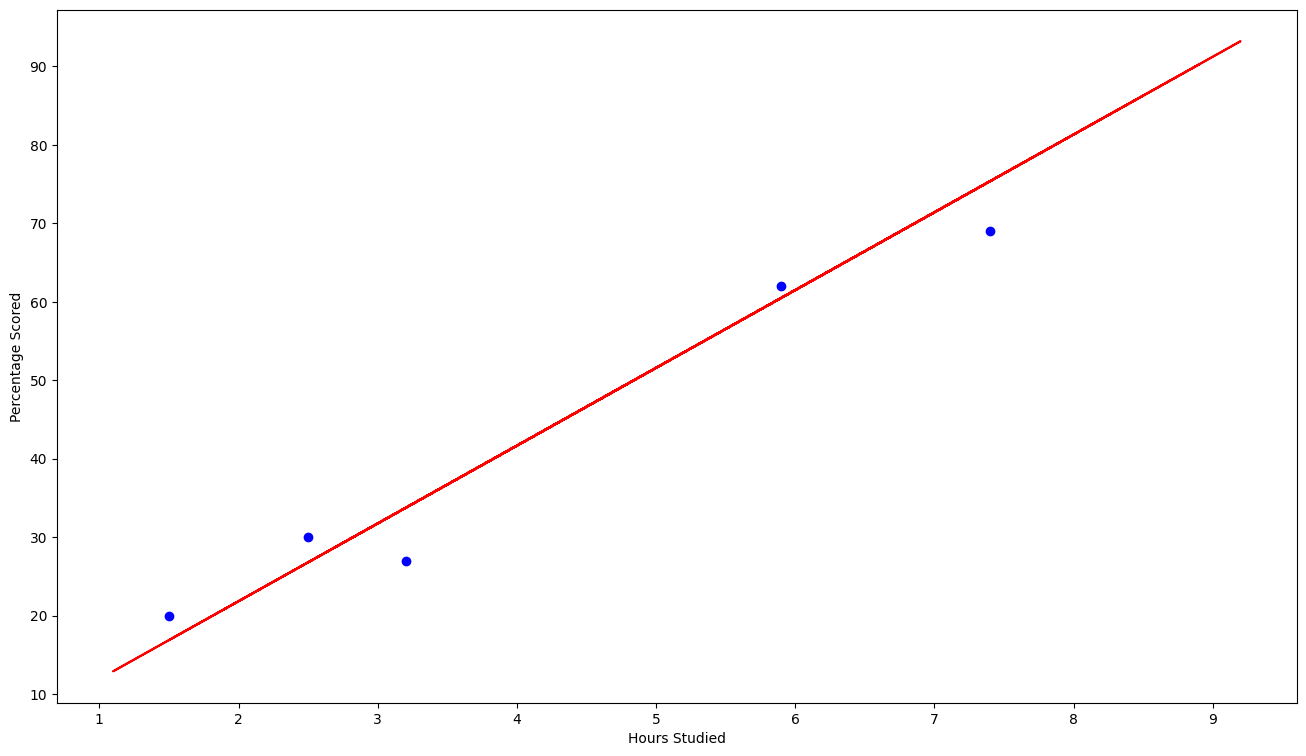

In [28]:
# Testing Data
plt.rcParams["figure.figsize"]= [16,9]
plt.scatter(x_test, y_test, color = "blue")
plt.plot(x, line, color = "red")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()


In [29]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [30]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

#  PREDICTIONS

In [31]:
#Predicting Score
y_pred = regressor.predict(x_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [33]:
df = pd.DataFrame({'Actual': [y_test], 'predicted' : [y_pred]})
df

,Actual,predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [34]:
#Testing own Data
hours = 9.25
own_pred = regressor.predict([[hours]])
print(f" If person studied for {hours} then predicted scores are {own_pred[0]}")

 If person studied for 9.25 then predicted scores are [93.69173249]


#  Evaluating the Model
The final step is to evaluate the performance of algorithm. This step is important to compare how well different algorithm perform on different dataset.

In [35]:
from sklearn import metrics
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error: 4.183859899002975


# Model Evaluation Metrics 

In [36]:
#Checking the efficiency of the model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error_value = mean_squared_error(y_test, y_pred)
mean_absolute_error_value = mean_absolute_error(y_test, y_pred)
print(mean_squared_error_value)
print(mean_absolute_error_value)

21.598769307217406
4.183859899002975
